In [19]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

c:\Users\Muhammad Midhat\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
# Load the dataset
data = pd.read_csv('IMDB Dataset.csv')

In [21]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [22]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [24]:
#Handling Null Values
data.isna().any()

review       False
sentiment    False
dtype: bool

In [25]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [26]:
#Handling Duplicate Values
data['review'].nunique()

49582

In [27]:
data.shape

(50000, 2)

In [28]:
data['review'].drop_duplicates(inplace = True)

In [29]:
data['review'].nunique()

49582

In [30]:
data.shape

(50000, 2)

In [31]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


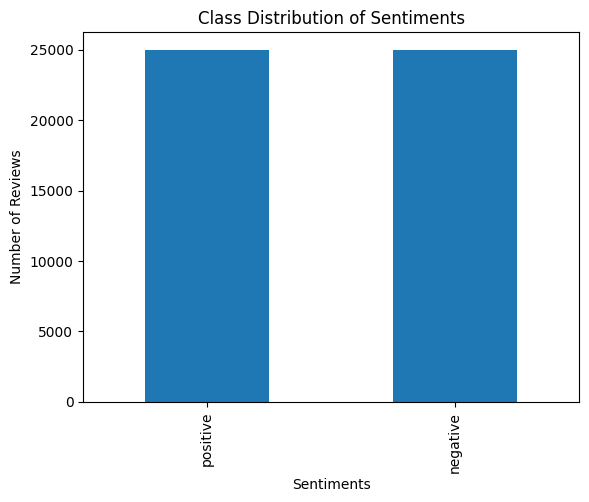

In [32]:
# Create a bar plot of the class distribution
class_counts = data['sentiment'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Number of Reviews')
plt.show()

In [33]:
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [34]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(data['review'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

In [36]:
# Split the text into individual words
words = all_text.split()

In [37]:
# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [38]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 132498),
 ('/><br', 100974),
 ('The', 67317),
 ('movie', 60762),
 ('film', 54277),
 ('one', 41334),
 ('like', 36028),
 ('This', 24329),
 ('would', 23578),
 ('good', 22582),
 ('It', 21475),
 ('really', 21322),
 ('even', 20979),
 ('see', 20364),
 ('-', 18201),
 ('get', 17333),
 ('much', 16827),
 ('story', 16443),
 ('time', 15312),
 ('make', 14859),
 ('could', 14689),
 ('also', 14607),
 ('people', 14414),
 ('great', 14385),
 ('/>The', 14335),
 ('first', 14283),
 ('made', 13418),
 ('think', 13083),
 ('bad', 12847),
 ('many', 12175),
 ('<br', 12028),
 ('never', 11984),
 ('two', 11489),
 ('But', 11435),
 ('little', 11206),
 ('it.', 11116),
 ('way', 11089),
 ('And', 11060),
 ('well', 10789),
 ('watch', 10688),
 ('movie.', 10659),
 ('know', 10656),
 ('seen', 10554),
 ('characters', 10448),
 ('character', 10307),
 ("It's", 10224),
 ('movies', 10118),
 ('love', 10033),
 ('best', 9899),
 ('ever', 9897),
 ('A', 9656),
 ('In', 9482),
 ('films', 9406),
 ('still', 9405),
 ('plot', 9305),
 ('ac

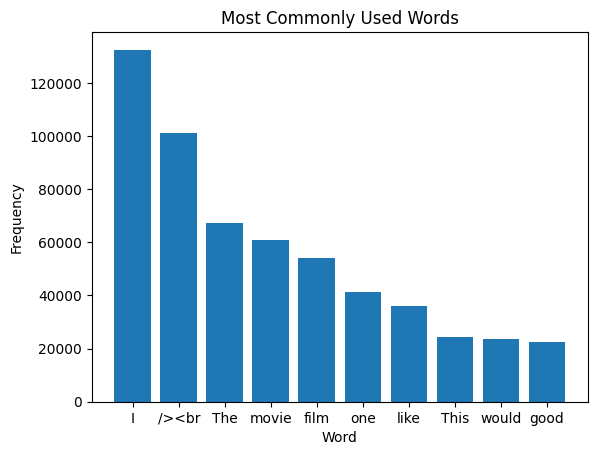

In [39]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

In [40]:
# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    # Join the words back into a string
    text = ' '.join(words)
    return text